Значення поліному Ньютона в точці x = 0.112: 1.2941593780404224
Значення поліному Ньютона в точці x = 0.145: 1.3962332227149825


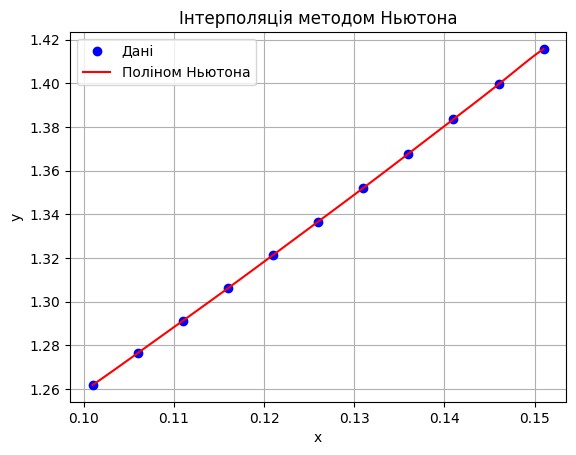

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Функція для обчислення таблиці різниць
def divided_diff(x, y):
    n = len(x)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])
    
    return coef[0, :]

# Функція для побудови поліному Ньютона
def newton_poly(coef, x_data, x):
    n = len(coef) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p
    return p

# Введення даних
x = np.array([0.101, 0.106, 0.111, 0.116, 0.121, 0.126, 0.131, 0.136, 0.141, 0.146, 0.151])
y = np.array([1.2618, 1.2764, 1.2912, 1.3061, 1.3213, 1.3366, 1.3520, 1.3677, 1.3835, 1.3995, 1.4157])

# Обчислення коефіцієнтів таблиці різниць
coef = divided_diff(x, y)

# Значення поліному Ньютона в точках x = 0.112 і x = 0.145
x_to_interpolate = [0.112, 0.145]
y_interpolated = [newton_poly(coef, x, xi) for xi in x_to_interpolate]

# Виведення результатів
for i, xi in enumerate(x_to_interpolate):
    print(f"Значення поліному Ньютона в точці x = {xi}: {y_interpolated[i]}")

# Побудова значень поліному для графіка
x_plot = np.linspace(min(x), max(x), 100)  # Розбиття області на 100 точок
y_plot = [newton_poly(coef, x, xi) for xi in x_plot]

# Побудова графіка
plt.plot(x, y, 'bo', label='Дані')  # Точки з оригінальними даними
plt.plot(x_plot, y_plot, 'r', label='Поліном Ньютона')  # Лінія поліному
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція методом Ньютона')
plt.legend()
plt.grid(True)
plt.show()

